Starting off by importing all the necessary libraries and packages required for this project.

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules 
from pandas.plotting import parallel_coordinates


**DATA EXPLORATION**

Viewing the dataframe and making some changes to strip extra spaces and dropping unnecassry rows.

In [4]:

# Loading the Data 
data =pd.read_csv('/content/data.csv',encoding= 'unicode_escape') 
data.head() 


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# Stripping extra spaces in the description 
data['Description'] = data['Description'].str.strip() 

# Dropping the rows without any invoice number 
data.dropna(axis = 0, subset =['InvoiceNo'], inplace = True) 
data['InvoiceNo'] = data['InvoiceNo'].astype('str') 

# Dropping all transactions which were done on credit 
data = data[~data['InvoiceNo'].str.contains('C')] 


In [47]:
print(data["Country"].unique())
print(data["Country"].value_counts(ascending=False))

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Bahrain' 'Israel' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']
United Kingdom          487622
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark   

Now I'll segment according to some of the highest performing regions in terms of transactions.

**MARKET SEGMENTATION**

As different countries have different consumer behaviours, I am segmenting the dataframe according to transactions done from different countries.

In [6]:
# Transactions done in France 
basket_France = (data[data['Country'] =="France"] 
		.groupby(['InvoiceNo', 'Description'])['Quantity'] 
		.sum().unstack().reset_index().fillna(0) 
		.set_index('InvoiceNo')) 

# Transactions done in the United Kingdom 
basket_UK = (data[data['Country'] =="United Kingdom"] 
		.groupby(['InvoiceNo', 'Description'])['Quantity'] 
		.sum().unstack().reset_index().fillna(0) 
		.set_index('InvoiceNo')) 

# Transactions done in Portugal 
basket_Ger = (data[data['Country'] =="Germany"] 
		.groupby(['InvoiceNo', 'Description'])['Quantity'] 
		.sum().unstack().reset_index().fillna(0) 
		.set_index('InvoiceNo')) 

basket_Aus = (data[data['Country'] =="Australia"] 
		.groupby(['InvoiceNo', 'Description'])['Quantity'] 
		.sum().unstack().reset_index().fillna(0) 
		.set_index('InvoiceNo')) 


In [7]:
# Defining the hot encoding function to make the data suitable 
# for the concerned libraries 
def hot_encode(x): 
	if(x<= 0): 
		return 0
	if(x>= 1): 
		return 1

# Encoding the datasets 
basket_encoded = basket_France.applymap(hot_encode) 
basket_France = basket_encoded 

basket_encoded = basket_UK.applymap(hot_encode) 
basket_UK = basket_encoded 

basket_encoded = basket_Ger.applymap(hot_encode) 
basket_Ger = basket_encoded 

basket_encoded = basket_Aus.applymap(hot_encode) 
basket_Aus = basket_encoded 


**FRENCH MARKET**

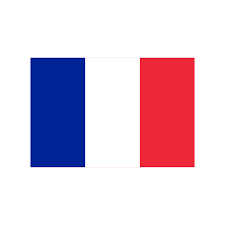

**PRUNING AND ASSOCIATION**

Reducing the number of itemsets to only the important ones using pruning by the apriori algorithm and then finding out the most rules b/w different items using association.

In [34]:
# Building the model 
frequent_itemsets = apriori(basket_France, min_support = 0.01, use_colnames = True) 

# Collecting the inferred rules in a dataframe 
rules = association_rules(frequent_itemsets, metric ="lift", min_threshold = 1) 
#sorting in a way that rows at the end represent the most optimal rules
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(len(rules)) 
print(rules) 


1350026
                                               antecedents  ... conviction
67424    (PLASTERS IN TIN CIRCUS PARADE, DINOSAUR LUNCH...  ...        inf
67425    (ALARM CLOCK BAKELIKE CHOCOLATE, ALARM CLOCK B...  ...        inf
69602    (ALARM CLOCK BAKELIKE GREEN, BUNDLE OF 3 ALPHA...  ...        inf
69607    (ALARM CLOCK BAKELIKE IVORY, SKULL LUNCH BOX W...  ...        inf
71644    (ALARM CLOCK BAKELIKE ORANGE, SPACEBOY BIRTHDA...  ...        inf
...                                                    ...  ...        ...
916773                                           (POSTAGE)  ...   1.000586
917152                                           (POSTAGE)  ...   1.000586
917530                                           (POSTAGE)  ...   1.000586
925089                                           (POSTAGE)  ...   1.000586
1113174                                          (POSTAGE)  ...   1.000586

[1350026 rows x 9 columns]


These are a lot of rules. I'll try and reduce them by increasing the minimum support after making the scatterplot.

Now to try and visualize the trend for France using a **scatterplot**

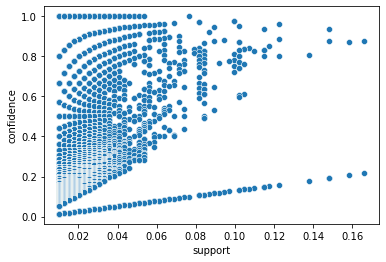

In [35]:
# Import seaborn under its standard alias
import seaborn as sns
import matplotlib.pyplot as plt

# Generate scatterplot using support and confidence
sns.scatterplot(x = "support", y = "confidence", data = rules)
plt.show()

This scatterplot indicates that throwing out low support values would also mean that we would discard rules that are strong according to confidence.There is also a somewhat inconsistent relationship b/w support and confidence.

In [35]:
# Building the model 
frequent_itemsets = apriori(basket_France, min_support = 0.05, use_colnames = True) 

# Collecting the inferred rules in a dataframe 
rules = association_rules(frequent_itemsets, metric ="lift", min_threshold = 1) 
#sorting in a way that rows at the end represent the most optimal rules
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(len(rules)) 
print(rules.head()) 


348
                                           antecedents  ... conviction
44                        (JUMBO BAG WOODLAND ANIMALS)  ...        inf
259  (RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...  ...        inf
272  (RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...  ...        inf
302  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...  ...  34.897959
300  (SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...  ...  34.489796

[5 rows x 9 columns]


**INSIGHTS:** I have now reduced the rules to 348. The output, particularly the last row indicates a high association b/w paper, napkins, paper and plates which indicates that these items are bought together frequently in France.

Now to check my findings using another metric such as leverage.

In [31]:
# Building the model 
frequent_itemsets = apriori(basket_France, min_support = 0.05, use_colnames = True) 

# Collecting the inferred rules in a dataframe 
rules = association_rules(frequent_itemsets, metric ="leverage", min_threshold = 0.1) 
#sorting in a way that rows at the end represent the most optimal rules
rules = rules.sort_values(['leverage', 'lift'], ascending =[False, False])
print(len(rules)) 
print(rules.head()) 


2
                       antecedents  ... conviction
0  (SET/6 RED SPOTTY PAPER PLATES)  ...  21.556122
1    (SET/6 RED SPOTTY PAPER CUPS)  ...   7.852041

[2 rows x 9 columns]


Leverage completely narrows down the rows to again establish that out findings about association rules are indeed correct.

Now again cooroborating this using the **parallel coordinates plot**

                antecedent consequent  rule
0  LUNCH BAG RED RETROSPOT    POSTAGE     0


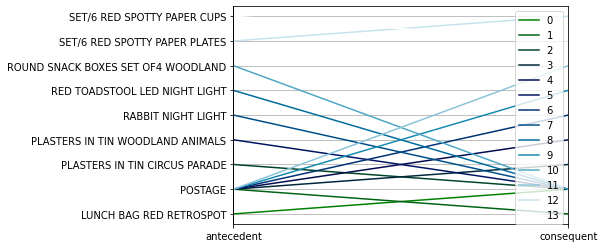

In [43]:
# Generate frequent itemsets
frequent_itemsets = apriori(basket_France, min_support = 0.12, use_colnames = True, max_len = 2)
# Generate association rules
rules = association_rules(frequent_itemsets, metric = 'conviction', min_threshold = 0.50)
# Convert rules to coordinates.
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
rules['rule'] = rules.index
# Define coordinates and label
coords = rules[['antecedent','consequent','rule']]
# Print example
print(coords.head(1))
parallel_coordinates(coords, 'rule', colormap = 'ocean')


**UK MARKET**

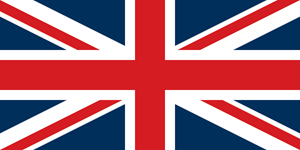

In [44]:
frequent_itemsets = apriori(basket_UK, min_support = 0.01, use_colnames = True) 
rules = association_rules(frequent_itemsets, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(rules) 


                                       antecedents  ... conviction
116           (BEADED CRYSTAL HEART PINK ON STICK)  ...  39.637454
2019  (JAM MAKING SET PRINTED, SUKI  SHOULDER BAG)  ...  26.096261
2295         (HERB MARKER THYME, HERB MARKER MINT)  ...  21.947242
2300   (HERB MARKER PARSLEY, HERB MARKER ROSEMARY)  ...  20.444965
2301      (HERB MARKER PARSLEY, HERB MARKER THYME)  ...  20.443856
...                                            ...  ...        ...
1720          (WHITE HANGING HEART T-LIGHT HOLDER)  ...   1.059623
440           (WHITE HANGING HEART T-LIGHT HOLDER)  ...   1.051583
294           (WHITE HANGING HEART T-LIGHT HOLDER)  ...   1.054629
1560          (WHITE HANGING HEART T-LIGHT HOLDER)  ...   1.063243
1742          (WHITE HANGING HEART T-LIGHT HOLDER)  ...   1.063184

[3760 rows x 9 columns]


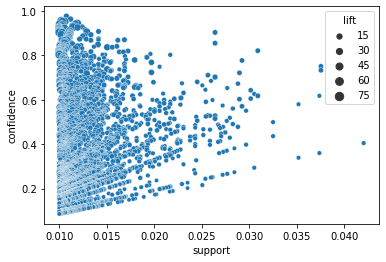

In [45]:
# Import seaborn under its standard alias
import seaborn as sns
import matplotlib.pyplot as plt

# Generate scatterplot using support and confidence
sns.scatterplot(x = "support", y = "confidence", size='lift', data = rules)
plt.show()

The highest values of lift are at the **support-confidence border**.

In [32]:
# Building the model 
frequent_itemsets = apriori(basket_UK, min_support = 0.03, use_colnames = True) 

# Collecting the inferred rules in a dataframe 
rules = association_rules(frequent_itemsets, metric ="leverage", min_threshold = 0.001) 
#sorting in a way that rows at the end represent the most optimal rules
rules = rules.sort_values(['leverage', 'lift'], ascending =[False, False])
print(len(rules)) 
print(rules.head()) 


16
                          antecedents  ... conviction
9           (JUMBO BAG RED RETROSPOT)  ...   1.576478
8           (JUMBO BAG PINK POLKADOT)  ...   2.777218
4   (ROSES REGENCY TEACUP AND SAUCER)  ...   3.551247
5   (GREEN REGENCY TEACUP AND SAUCER)  ...   3.803087
12          (JUMBO BAG RED RETROSPOT)  ...   1.468299

[5 rows x 9 columns]


**INSIGHTS:** Upon narrowing it down to the 16 most important rules, it can be seen that British people buy different colored tea utensils together.

                   antecedent                consequent  rule
0  ALARM CLOCK BAKELIKE GREEN  ALARM CLOCK BAKELIKE RED     0


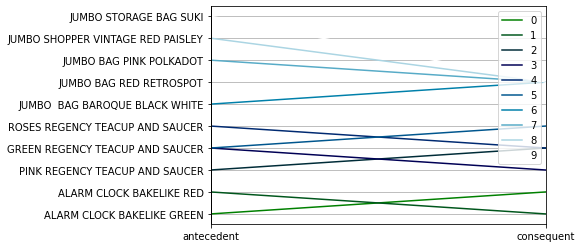

In [34]:
# Generate frequent itemsets
frequent_itemsets = apriori(basket_UK, min_support = 0.03, use_colnames = True, max_len = 2)
# Generate association rules
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.50)
# Convert rules to coordinates.
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
rules['rule'] = rules.index
# Define coordinates and label
coords = rules[['antecedent','consequent','rule']]
# Print example
print(coords.head(1))
parallel_coordinates(coords, 'rule', colormap = 'ocean')


**GERMAN MARKET**

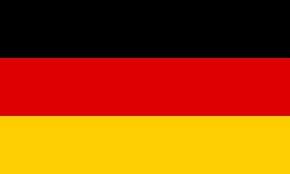


In [47]:
frequent_itemsets = apriori(basket_Ger, min_support = 0.01, use_colnames = True) 
rules = association_rules(frequent_itemsets, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(len(rules))
print(rules) 


47472
                                             antecedents  ... conviction
29721  (PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPO...  ...        inf
29722  (PACK OF 20 SKULL PAPER NAPKINS, PACK OF 6 SKU...  ...        inf
29723  (SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL ...  ...        inf
29724  (PACK OF 6 SKULL PAPER CUPS, PACK OF 6 SKULL P...  ...        inf
34643  (SET OF 4 KNICK KNACK TINS DOILY, ROUND STORAG...  ...        inf
...                                                  ...  ...        ...
42786                                          (POSTAGE)  ...   1.000243
42966                                          (POSTAGE)  ...   1.000243
43056                                          (POSTAGE)  ...   1.000243
43656                                          (POSTAGE)  ...   1.000243
43777                                          (POSTAGE)  ...   1.000243

[47472 rows x 9 columns]


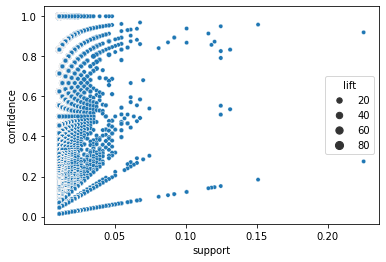

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate scatterplot using support and confidence
sns.scatterplot(x = "support", y = "confidence", size='lift',data = rules)
plt.show()

In [55]:
frequent_itemsets = apriori(basket_Ger, min_support = 0.05, use_colnames = True) 
rules = association_rules(frequent_itemsets, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(len(rules))
print(rules) 


120
                                           antecedents  \
34                         (PLASTERS IN TIN STRONGMAN)   
50                   (RETROSPOT TEA SET CERAMIC 11 PC)   
53                 (ROUND SNACK BOXES SET OF 4 FRUITS)   
103  (ROUND SNACK BOXES SET OF4 WOODLAND, ROUND SNA...   
33                          (PLASTERS IN TIN SPACEBOY)   
..                                                 ...   
56                                           (POSTAGE)   
10                                           (POSTAGE)   
83                                           (POSTAGE)   
20                                           (POSTAGE)   
48                                           (POSTAGE)   

                                           consequents  antecedent support  \
34                                           (POSTAGE)            0.070022   
50                                           (POSTAGE)            0.056893   
53                                           (POSTAGE)           

**INSIGHTS:** It can be seen that German people frequently buy tea utensils and snack boxes together.

                      antecedent consequent  rule
0  PLASTERS IN TIN CIRCUS PARADE    POSTAGE     0


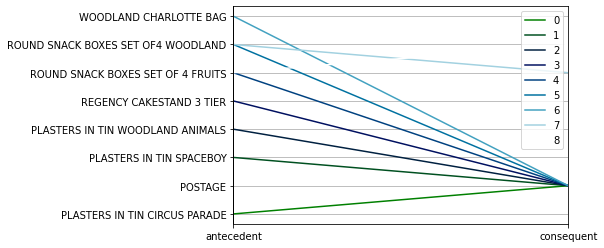

In [52]:
# Generate frequent itemsets
frequent_itemsets = apriori(basket_Ger, min_support = 0.10, use_colnames = True, max_len = 2)
# Generate association rules
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.4)
# Convert rules to coordinates.
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
rules['rule'] = rules.index
# Define coordinates and label
coords = rules[['antecedent','consequent','rule']]
# Print example
print(coords.head(1))
parallel_coordinates(coords, 'rule', colormap = 'ocean')


**AUSTRALIAN MARKET**

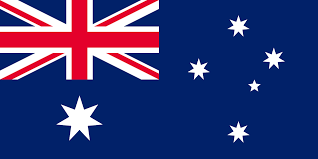

In [16]:
frequent_itemsets = apriori(basket_Aus, min_support = 0.07, use_colnames = True) 
rules = association_rules(frequent_itemsets, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(len(rules))
print(rules) 


800
                             antecedents  ... conviction
0             (RED RETROSPOT CAKE STAND)  ...        inf
1        (36 PENCILS TUBE RED RETROSPOT)  ...        inf
52                (FELTCRAFT DOLL MOLLY)  ...        inf
53        (SET OF 4 PANTRY JELLY MOULDS)  ...        inf
106  (SET OF 12 FAIRY CAKE BAKING CASES)  ...        inf
..                                   ...  ...        ...
95    (SET OF 3 CAKE TINS PANTRY DESIGN)  ...   1.673684
127   (SET OF 3 CAKE TINS PANTRY DESIGN)  ...   1.673684
83    (SET OF 3 CAKE TINS PANTRY DESIGN)  ...   1.610526
116   (SET OF 3 CAKE TINS PANTRY DESIGN)  ...   1.610526
119   (SET OF 3 CAKE TINS PANTRY DESIGN)  ...   1.610526

[800 rows x 9 columns]


**INSIGHTS:**
Australian customers mostly buy cake related items so cake stands, tins and molds should be placed together.

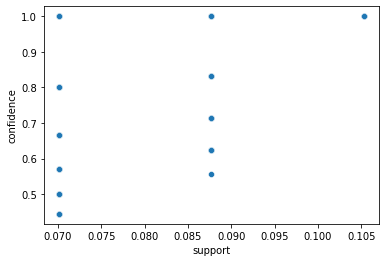

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate scatterplot using support and confidence
sns.scatterplot(x = "support", y = "confidence" ,data = rules)
plt.show()

**Note:** computing the scatterplot for a high support since collab was taking too much RAM and compile time to generate for min_support=0.01

                   antecedent                consequent  rule
0  ALARM CLOCK BAKELIKE GREEN  ALARM CLOCK BAKELIKE RED     0


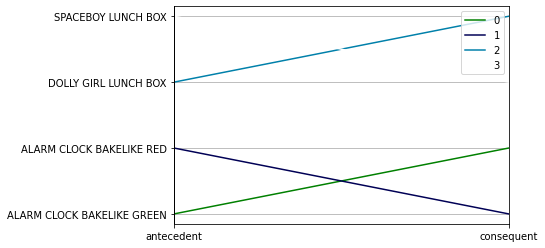

In [31]:
from pandas.plotting import parallel_coordinates
# Generate frequent itemsets
frequent_itemsets = apriori(basket_Aus, min_support = 0.09, use_colnames = True, max_len = 2)
# Generate association rules
rules = association_rules(frequent_itemsets, metric = 'conviction', min_threshold = 1.6)
# Convert rules to coordinates.
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
rules['rule'] = rules.index
# Define coordinates and label
coords = rules[['antecedent','consequent','rule']]
# Print example
print(coords.head(1))
parallel_coordinates(coords, 'rule', colormap = 'ocean')


**INSIGHT:** Contrary to my previous insight, this scatterplot tells another story. This shows that alarm clocks and bakelike red are highly correlated. So my recommendation would be to group both these two separate set of items together.